In [ ]:
# This notebook tests different bits and pieces that will go into the Fizeau control loop

# created 2018 July 5 by E.S.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy.ma as ma
import os.path
from scipy import misc, signal, ndimage
from astropy.io import fits
from matplotlib.colors import LogNorm
% matplotlib inline

In [2]:
from lmircam_tools import *
from lmircam_tools import overlap_psfs

In [3]:
# for starters, read in some real data and FFT the Fizeau/Airy PSFs

In [21]:
stem = ('/home/../../media/unasemaje/Seagate Expansion Drive/lbti_data_reduction/180507_fizeau_altair/01_fix_pixed/')

In [14]:
#stem = ('./images/')

In [32]:
# for loop to take cookie cut-outs of Fizeau/Airy PSFs, and take FFTs
for f in range(5611,11497):  # full dataset in HOSTS footprint: (4249,11497)

    filename_str = stem+'lm_180507_'+str("{:0>6d}".format(f))+'.fits'
    
    if os.path.isfile(filename_str): # if FITS file exists in the first place
    
        image, header = fits.getdata(filename_str,0,header=True) 
    
        # locate PSF
        psf_loc = overlap_psfs.find_airy_psf(image)
    
        # size of cookie cut-out (measured center-to-edge)
        cookie_size = 50
    
        # take FFT
        cookie_cut = image[psf_loc[0]-cookie_size:psf_loc[0]+cookie_size,psf_loc[1]-cookie_size:psf_loc[1]+cookie_size]
        amp, arg = fft_img(cookie_cut).fft(padding=int(5*cookie_size), mask_thresh=1e5)
    
        if (np.shape(amp)[0]!=np.shape(amp)[1]): # if the FFT doesn't make sense (i.e., if PSF was not found)
            continue
    
        # make plot
        plt.subplot(2, 3, 1) # PSF cut-out
        plt.imshow(cookie_cut, origin="lower", cmap="gray", extent=[0,cookie_cut.shape[0],0,cookie_cut.shape[1]])  
        plt.scatter([int(0.5*cookie_cut.shape[0]),int(0.5*cookie_cut.shape[0])],
             [int(0.5*cookie_cut.shape[1]),int(0.5*cookie_cut.shape[1])], color='red',s=50,marker='+') # put dot in center of PSF
        plt.title('PSF')
    
        plt.subplot(2, 3, 2) # FFT amp
        plt.imshow(amp, origin="lower", vmin=1e5, vmax=1.4e7)
        plt.title('FFT amp')
    
        plt.subplot(2, 3, 3) # FFT phase
        plt.imshow(arg, origin="lower", vmin=-180, vmax=180)
        plt.title('FFT phase')
    
        plt.subplot(2, 3, 5) # FFT amp
        plt.plot(np.arange(np.shape(amp)[0]),amp[int(0.5*np.shape(amp)[0]),:])
        plt.ylim([0,1.4e7])
        #plt.title('FFT amp')
    
        plt.subplot(2, 3, 6) # FFT phase
        plt.plot(np.arange(np.shape(arg)[0]),arg[int(0.5*np.shape(arg)[0]),:])
        plt.ylim([-180,180])
        #plt.title('FFT phase')
    
        plt.tight_layout()
    
        if (header['PCCLOSED']==1): # if Phasecam loop was closed
            pc_string = 'PC **CLOSED**'
        else:
            pc_string = 'PC OPEN'
    
        plt.suptitle(str("{:0>6d}".format(f)) + ', ' + pc_string)
    
        #plt.show()
    
        plt.savefig("images/psf_altair_fft_check_"+str("{:0>6d}".format(f))+".png", dpi=300, overwrite=False)
        plt.clf()
    
        print('Frame '+str("{:0>6d}".format(f))+' done...')

Frame 005611 done...
Frame 005612 done...
Frame 005615 done...
Frame 005621 done...
Frame 005624 done...
Frame 005627 done...
Frame 005628 done...
Frame 005631 done...
Frame 005637 done...
Frame 005639 done...
Frame 005640 done...
Frame 005641 done...
Frame 005642 done...
Frame 005643 done...
Frame 005644 done...
Frame 005645 done...
Frame 005646 done...
Frame 005647 done...
Frame 005648 done...
Frame 005649 done...
Frame 005650 done...
Frame 005651 done...
Frame 005652 done...
Frame 005653 done...
Frame 005654 done...
Frame 005655 done...
Frame 005656 done...
Frame 005657 done...
Frame 005658 done...
Frame 005659 done...
Frame 005660 done...
Frame 005661 done...
Frame 005662 done...
Frame 005663 done...
Frame 005664 done...
Frame 005665 done...
Frame 005666 done...
Frame 005667 done...
Frame 005668 done...
Frame 005669 done...
Frame 005670 done...
Frame 005671 done...
Frame 005672 done...
Frame 005673 done...
Frame 005674 done...
Frame 005675 done...
Frame 005676 done...
Frame 005677 

In [31]:
np.shape(amp)

(600, 600)

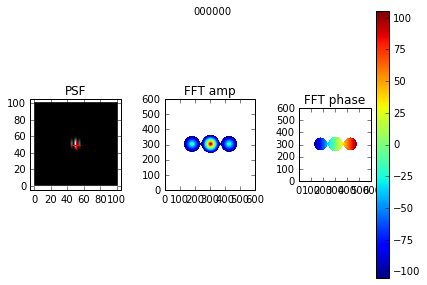

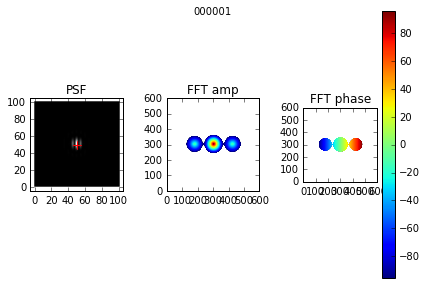

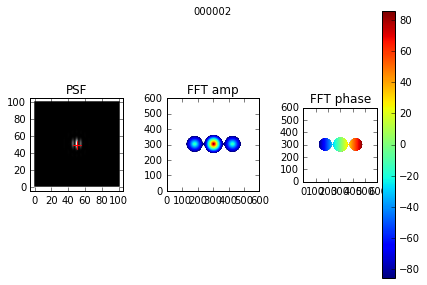

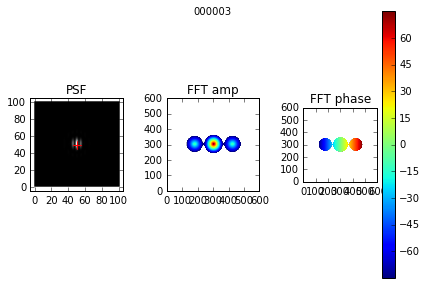

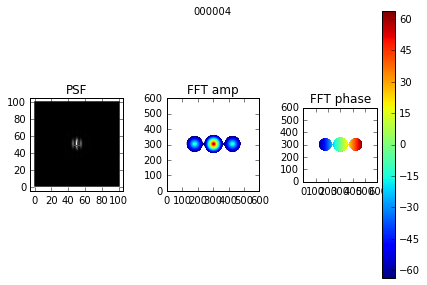

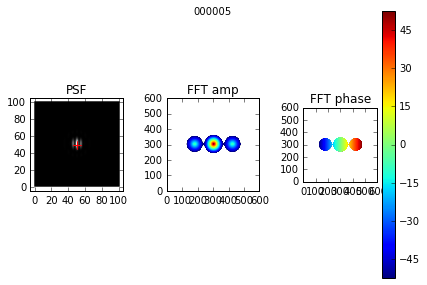

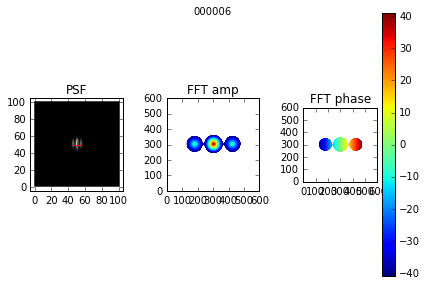

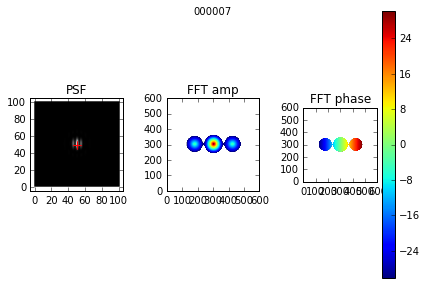

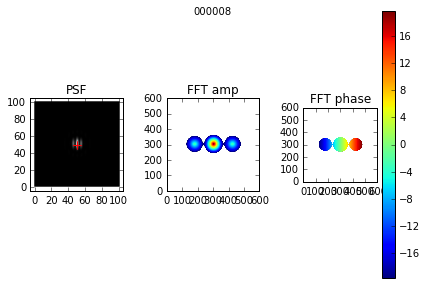

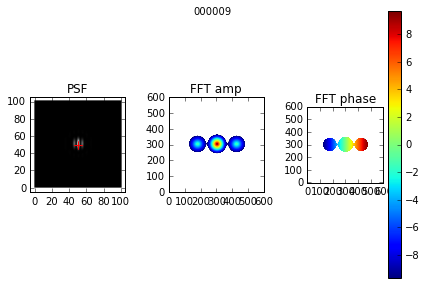

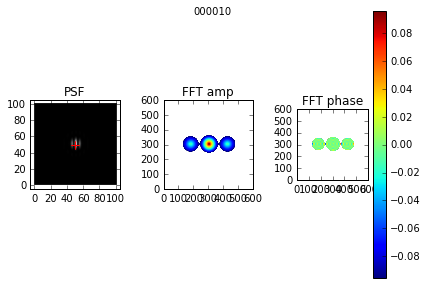

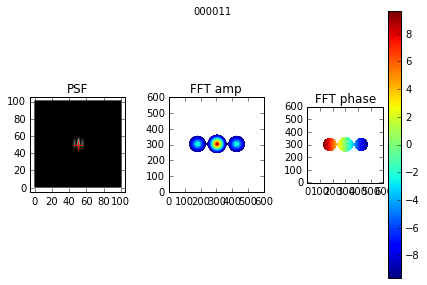

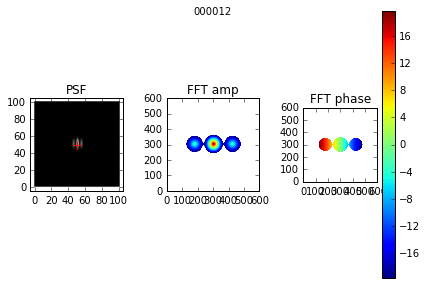

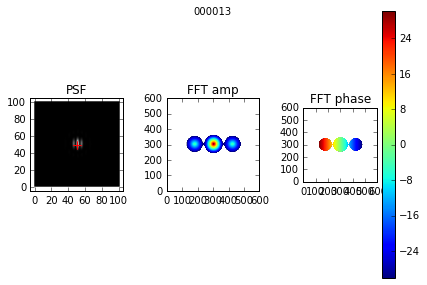

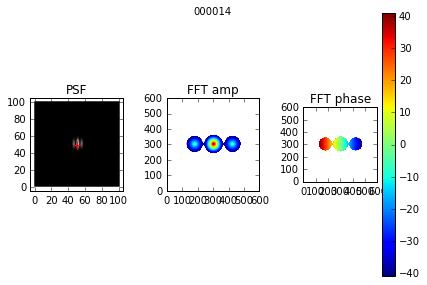

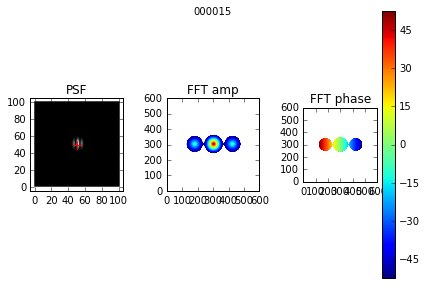

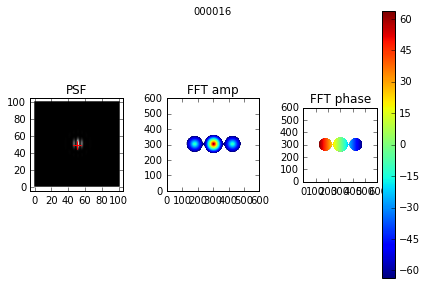

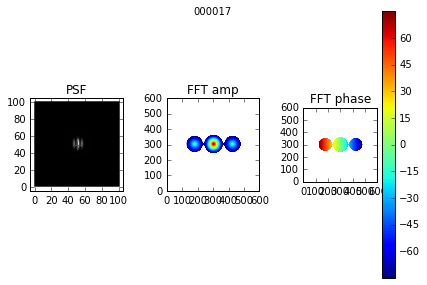

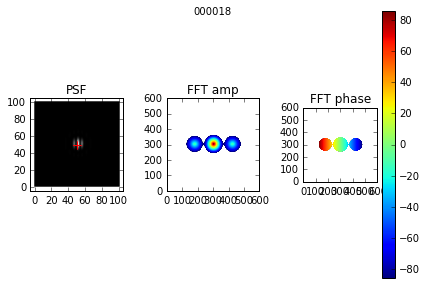

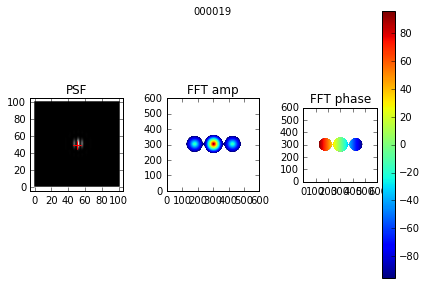

In [19]:
# THIS IS TO READ IN TEST IMAGES

for f in range(0,20):

    image, header = fits.getdata(stem+'perfect_psf.fits',
                                 0,
                                 header=True) 
    
    # locate PSF
    psf_loc = overlap_psfs.find_airy_psf(image)
    
    # size of cookie cut-out (measured center-to-edge)
    cookie_size = 50
    
    # take FFT
    cookie_cut = image[psf_loc[0]-cookie_size:psf_loc[0]+cookie_size,psf_loc[1]-cookie_size:psf_loc[1]+cookie_size]
    
    # roll?
    #cookie_cut = np.roll(cookie_cut, 10, axis=1)
    cookie_cut = scipy.ndimage.interpolation.shift(cookie_cut,[0,-1+0.1*f])
    
    amp, arg = fft_img(cookie_cut).fft(padding=int(5*cookie_size), mask_thresh=1e5)
    
    # make plot
    plt.subplot(1, 3, 1) # PSF cut-out
    plt.imshow(cookie_cut, origin="lower", cmap="gray", extent=[0,cookie_cut.shape[0],0,cookie_cut.shape[1]])  
    plt.scatter([int(0.5*cookie_cut.shape[0]),int(0.5*cookie_cut.shape[0])],
             [int(0.5*cookie_cut.shape[1]),int(0.5*cookie_cut.shape[1])], color='red',s=50,marker='+') # put dot in center of PSF
    plt.title('PSF')
    
    plt.subplot(1, 3, 2) # FFT amp
    plt.imshow(amp, origin="lower")
    plt.title('FFT amp')
    
    plt.subplot(1, 3, 3) # FFT phase
    plt.imshow(arg, origin="lower")
    plt.colorbar()
    plt.title('FFT phase')
    
    plt.tight_layout()
    
    plt.suptitle(str("{:0>6d}".format(f)))
    
    plt.show()
    
    #plt.figure(figsize=(150,200))
    
    #plt.savefig("images/psf_fake_perfect_fft_check_"+str("{:0>6d}".format(f))+".pdf", overwrite=False)
    plt.clf()
    

In [ ]:
# how are FFTs affected by
# 1. fringe movement
# 2. changing visibility
# 3. stuff listed in my table

# ... and how good am I at finding the center of the PSF?

In [ ]:
# based on the images, decide whether to move HPC in piston, tip, tilt
# iterate?
# maybe I don't want to move HPC in piston, because I found the center of the envelope with the grism,
# and Phasecam isn't closed yet